#  Recommendation System for Netflix Prize Dataset using SVD

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To load the 'combined_data_1' dataset after uploading it to Jupyter notebook

In [4]:
# Reading dataset file
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#not named---->we are naming the columns

# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)
#3
#3.5----->float--->rating column



In [5]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [6]:
#To inspect the shape of the datset
dataset.shape



(203817, 2)

In [7]:
#To print the head of dataset
dataset.head()

#1:----->1st movie
#1xyz rows

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [8]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])
#3--->1st row
#3--->10th row
#3  merge it
p

,count
Rating,
1.0,8151
2.0,17610
3.0,56223
4.0,77339
5.0,44463


In [9]:
# get movie count by counting nan values

movie_count = dataset.isnull().sum()[1]

movie_count

#4499 total number of movies present in dataset

31

In [10]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

153322

In [11]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

203786

## To plot the distribution of the ratings in as a bar plot

Text(0.5, 1.0, 'Total pool: 31 Movies, 153322 customers, 203786 ratings given')

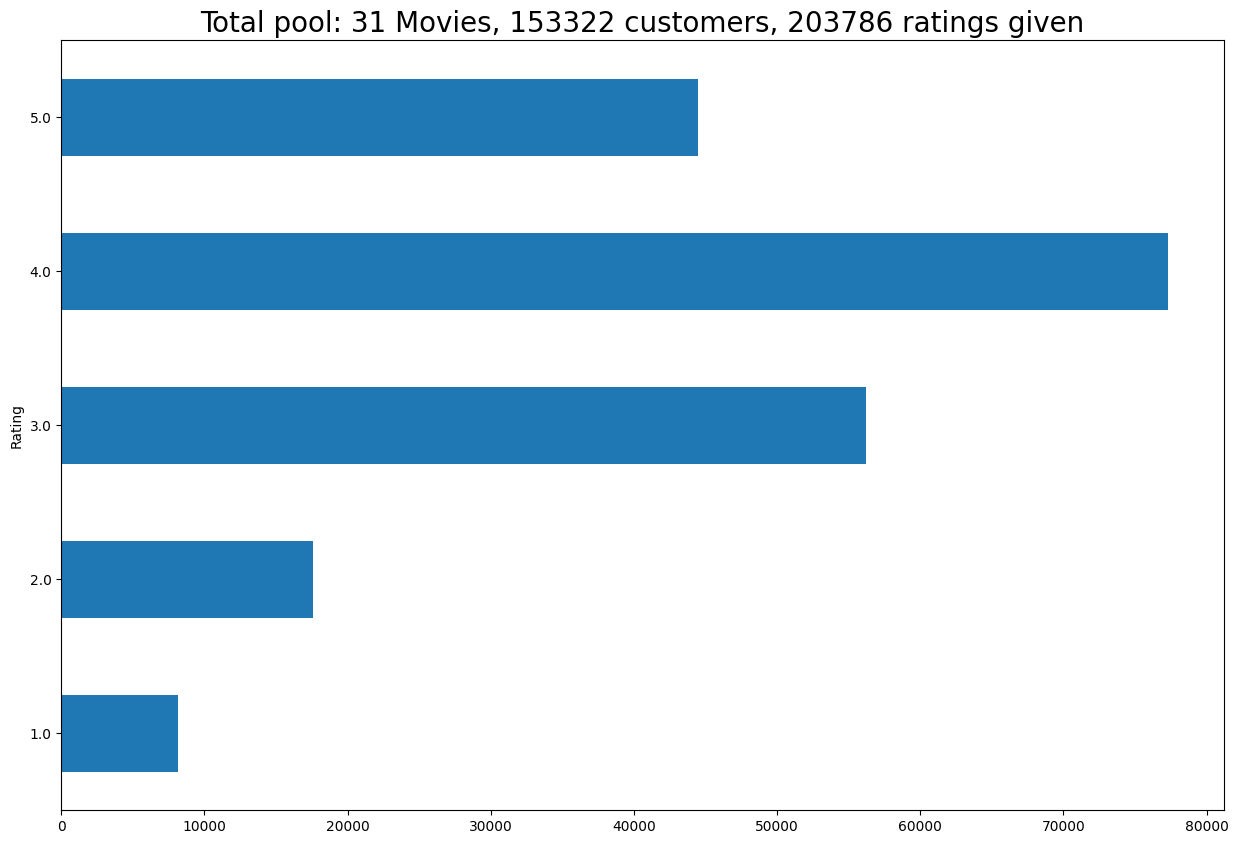

In [12]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
#plt.axis('off')


#print--->print data  '' 'Total pool'

# To create a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset

In [13]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [14]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]


df_nan.shape

(31, 1)

In [15]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()



df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [16]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [ 1.  1.  1. ... 30. 30. 30.]
Length: 203786


In [17]:
#x =zip(df_nan['index'][1:],df_nan['index'][:-1])

In [18]:
#temp = np.full((1,547), 1)

In [19]:
#print(temp)

In [20]:
#tuple(x)

In [21]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


<ipython-input-21-949fa75c1e41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Movie_Id'] = movie_np.astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [22]:
dataset.shape

(203786, 3)

# Data Cleaning

In [23]:
f = ['count','mean']
#count and mean

In [24]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1245.0


In [25]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')



Customer minimum times of review: 1.0


In [26]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (203786, 3)


In [27]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (195385, 3)


In [28]:

print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [29]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(150252, 9)


In [30]:
df_p.head()

Movie_Id,3,8,16,17,18,24,26,28,30
Cust_Id,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
7,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


### To load the movie_titles dataset

In [60]:
import csv

# Open the CSV file and read it line by line
with open('movie_titles.csv', encoding="ISO-8859-1") as file:
    reader = csv.reader(file)
    for i, line in enumerate(reader):
        if len(line) != 3:
            print(f"Line {i+1}: {line}")

Line 72: ['72', '1974', 'At Home Among Strangers', ' A Stranger Among His Own']
Line 264: ['264', '2002', 'Angelina Ballerina: Lights', ' Camera', ' Action!']
Line 350: ['350', '1993', 'Dr. Quinn', ' Medicine Woman: Season 3']
Line 366: ['366', '2004', 'Still', ' We Believe: The Boston Red Sox Movie']
Line 394: ['394', '1916', '20', '000 Leagues Under the Sea']
Line 466: ['466', '1990', 'Doogie Howser', ' M.D.: Season 2']
Line 582: ['582', '1986', 'Jo Jo Dancer', ' Your Life is Calling']
Line 600: ['600', '1966', "What's Up", ' Tiger Lily?']
Line 670: ['670', '2002', 'He Loves Me', ' He Loves Me Not']
Line 672: ['672', '1991', 'He Said', ' She Said']
Line 729: ['729', '2000', 'Fast Food', ' Fast Women']
Line 776: ['776', '1953', "Dr. Seuss's The 5", '000 Fingers of Dr. T']
Line 827: ['827', '1994', "C'est La Vie", ' Mon Cheri']
Line 834: ['834', '1999', 'Niagara: Miracles', ' Myths & Magic: IMAX']
Line 891: ['891', '2003', "Zakk Wylde's Black Label Society: Boozed", ' Broozed & Broken-

In [63]:
import pandas as pd
import csv

# Define a function to clean the rows
def clean_row(row):
    if len(row) > 3:
        # Merge extra columns into the 'Name' column
        row[2] = ' '.join(row[2:])
        return row[:3]
    else:
        return row

# Read the CSV file and clean the rows
rows = []
with open('movie_titles.csv', encoding="ISO-8859-1") as file:
    reader = csv.reader(file)
    for row in reader:
        rows.append(clean_row(row))

# Create a DataFrame from the cleaned data
df_title = pd.DataFrame(rows, columns=['Movie_Id', 'Year', 'Name'])

# Set the index to 'Movie_Id'
df_title.set_index('Movie_Id', inplace=True)

# Save the cleaned data back to the original CSV file
df_title.to_csv('movie_titles.csv')

# Display the first 10 rows
print(df_title.head(10))


          Year                          Name
Movie_Id                                    
1         2003               Dinosaur Planet
2         2004    Isle of Man TT 2004 Review
3         1997                     Character
4         1994  Paula Abdul's Get Up & Dance
5         2004      The Rise and Fall of ECW
6         1997                          Sick
7         1992                         8 Man
8         2004    What the #$*! Do We Know!?
9         1991      Class of Nuke 'Em High 2
10        2001                       Fighter


In [64]:
df_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

          Year                          Name
Movie_Id                                    
Movie_Id  Year                          Name
1         2003               Dinosaur Planet
2         2004    Isle of Man TT 2004 Review
3         1997                     Character
4         1994  Paula Abdul's Get Up & Dance
5         2004      The Rise and Fall of ECW
6         1997                          Sick
7         1992                         8 Man
8         2004    What the #$*! Do We Know!?
9         1991      Class of Nuke 'Em High 2


# To install the scikit-surprise library for implementing SVD

### Run the following command in the Anaconda Prompt to install surprise package

In [40]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357228 sha256=99513e313d18c7260e80b22e20863a6b50f697907d0ed3309e0ff862cbb1f7eb
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [41]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [42]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0396  1.0382  1.0356  1.0378  0.0017  
MAE (testset)     0.8301  0.8267  0.8195  0.8255  0.0044  
Fit time          1.51    1.54    1.73    1.59    0.10    
Test time         0.30    0.19    0.44    0.31    0.10    


{'test_rmse': array([1.03964131, 1.03820567, 1.03557899]),
 'test_mae': array([0.83009102, 0.82671734, 0.81954411]),
 'fit_time': (1.512866735458374, 1.5361413955688477, 1.7308895587921143),
 'test_time': (0.3005983829498291, 0.19136667251586914, 0.4396049976348877)}

In [43]:
dataset.head()

,Cust_Id,Rating,Movie_Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


## To find all the movies rated as 5 stars by user with userId = 712664

In [65]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
3    NaN
Name: Name, dtype: object

# Train an SVD to predict ratings for user with userId = 1

In [69]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

       Year                                     Name  Estimate_Score
0      Year                                     Name        3.820291
11845  1955                               Summertime        3.820291
11851  1946                             The Yearling        3.820291
11850  2003  Dumb and Dumberer: When Harry Met Lloyd        3.820291
11849  1998                                    Earth        3.820291
11848  1997                     For Richer or Poorer        3.820291
11847  2005                            Dust to Glory        3.820291
11846  1985                           Prizzi's Honor        3.820291
11844  1967                     Barefoot in the Park        3.820291
11836  1952                           Victory at Sea        3.820291
